In [1]:
from qutip import *
import numpy as np
import importlib
import functions_fbq
from functions_fbq import *
importlib.reload(functions_fbq)
# importlib.reload(figus)
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams.update(plt.rcParamsDefault)
from mpl_toolkits import mplot3d
from scipy.interpolate import interp1d
from figurestyle import *

elemento de matriz vs. r
derivada de f_01 vs. r
frecuencia vs. r

* Hacerlo para el hamiltoniano de Zazunov así como para el de una juntura Josephson.
* Luego debo estudiar más el blochnium y encontrar los parámetros óptimos con el que se maximiza la coherencia.
* Posteriormente puedo estudiar la forma de realizar operaciones con el blochnium que maximice el ratio: tiempo de coherencia / tiempo de manipulación.


In [2]:
# Simulation parameters
N = 100
eigvals = 6
# System parameters
Ec = 40e9
El = 66.5e6
EDelta = 20e9

In [3]:
r_list = np.linspace(0.05, 1, 100)
eigvals_list_phi_0 = np.zeros((len(r_list), eigvals))
eigvals_list_phi_pi = np.zeros((len(r_list), eigvals))
phi_matrix_elements_list = np.zeros((2,len(r_list))) # 0: phi_ext = 0, 1: phi_ext = pi
n_matrix_elements_list = np.zeros((2,len(r_list))) # 0: phi_ext = 0, 1: phi_ext = pi

for i,r in enumerate(tqdm(r_list)):
    phi_ext = 0
    eigvals_list_phi_0[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_list[0,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_list[0,i] = np.abs(matrix_op_sqr_list[1])**2

    phi_ext = np.pi
    eigvals_list_phi_pi[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_list[1,i] = np.abs(matrix_op_sqr_list[1])**2

100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


In [4]:
phi_list = np.linspace(0, 2*np.pi, 100)
eigvals_list_r_10 = np.zeros((len(phi_list), eigvals))
eigvals_list_r_05 = np.zeros((len(phi_list), eigvals))
eigvals_list_r_005 = np.zeros((len(phi_list), eigvals))
phi_matrix_elements_vs_phi_list = np.zeros((3,len(phi_list))) # 0: r = 0.9, 1: r = 0.5, 2: r = 0.05
n_matrix_elements_vs_phi_list = np.zeros((3,len(phi_list))) # 0: r = 0.9, 1: r = 0.5, 2: r = 0.05

for i,phi_ext in enumerate(tqdm(phi_list)):
    r = 0.9
    eigvals_list_r_10[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_vs_phi_list[0,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_vs_phi_list[0,i] = np.abs(matrix_op_sqr_list[1])**2

    r = 0.5
    eigvals_list_r_05[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_vs_phi_list[1,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_vs_phi_list[1,i] = np.abs(matrix_op_sqr_list[1])**2

    r = 0.05
    eigvals_list_r_005[i,:], _, matrix_op_sqr_list = eigensystem_and_matrix_elements_sqr_fbq(Ec,El,EDelta,phi_ext,r, N = 100, eigvals = eigvals)
    phi_matrix_elements_vs_phi_list[2,i] = np.abs(matrix_op_sqr_list[0])**2
    n_matrix_elements_vs_phi_list[2,i] = np.abs(matrix_op_sqr_list[1])**2

100%|██████████| 100/100 [01:10<00:00,  1.41it/s]


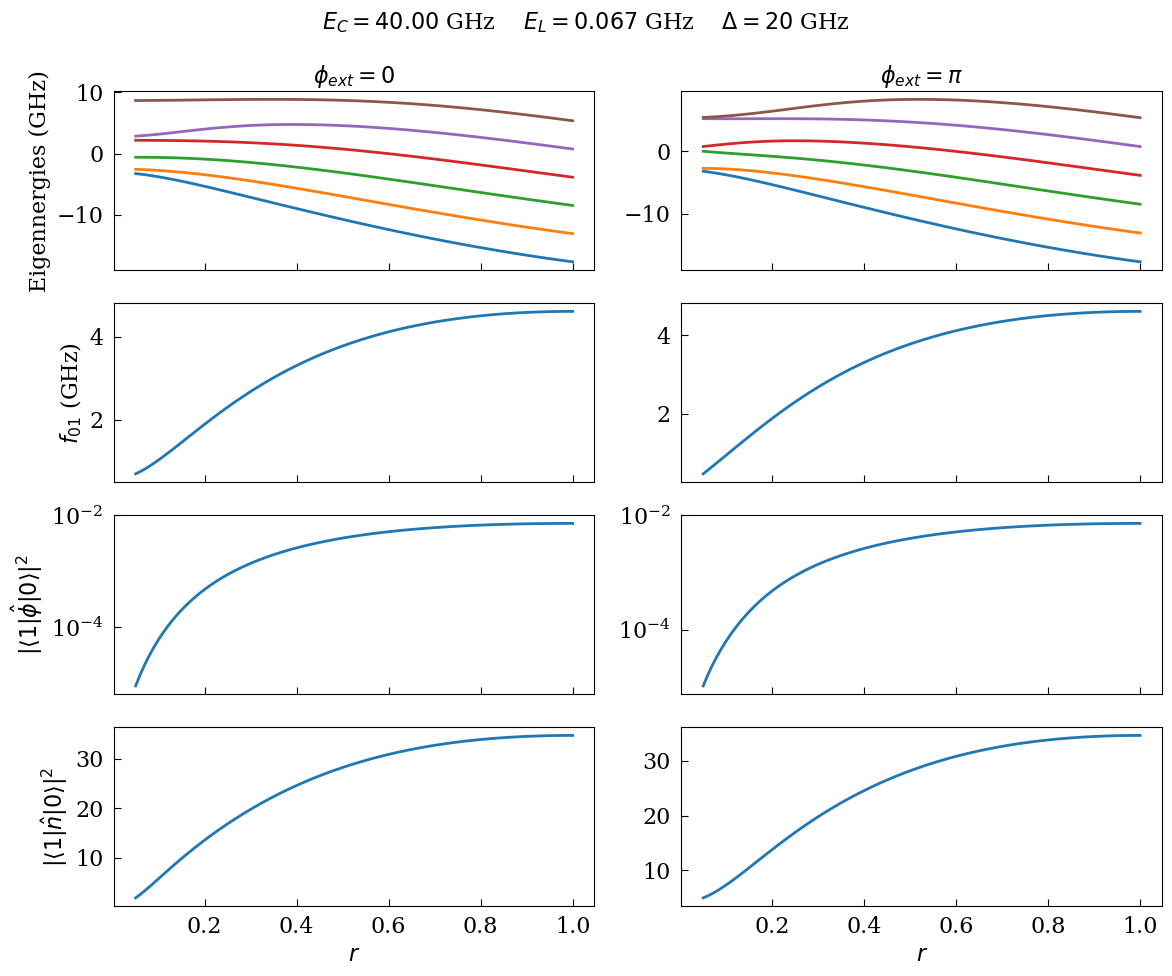

In [5]:
figure_features()
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex = True, sharey = False)

plt.suptitle(r'$E_{C} = %.2f $ GHz $\quad E_{L} = %.3f$ GHz $\quad \Delta = %.0f$ GHz' %(Ec*1e-9, El*1e-9, EDelta*1e-9))
axs[0,0].plot(r_list, eigvals_list_phi_0[:,:]*1e-9)
axs[0,0].set_ylabel(r'Eigennergies (GHz)')
axs[0,0].set_title(r'$\phi_{ext} = 0$')

axs[1,0].plot(r_list, (eigvals_list_phi_0[:,1]-eigvals_list_phi_0[:,0])*1e-9)
axs[1,0].set_ylabel(r'$f_{01}$ (GHz)')

axs[2,0].plot(r_list, phi_matrix_elements_list[0,:])
axs[3,0].plot(r_list, n_matrix_elements_list[0,:])
axs[2,0].set_ylabel(r'$|\langle 1 | \hat{\phi} | 0 \rangle|^2$')
axs[3,0].set_ylabel(r'$|\langle 1 | \hat{n} | 0 \rangle|^2$')

axs[0,1].plot(r_list, eigvals_list_phi_pi[:,:]*1e-9)
axs[0,1].set_title(r'$\phi_{ext} = \pi$')

axs[1,1].plot(r_list, (eigvals_list_phi_pi[:,1]-eigvals_list_phi_pi[:,0])*1e-9)

axs[2,1].plot(r_list, phi_matrix_elements_list[1,:], label = r'$|\langle \phi | \hat{\phi} \rangle|^2$')
axs[3,1].plot(r_list, n_matrix_elements_list[1,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')

axs[3,0].set_xlabel(r'$r$')
axs[3,1].set_xlabel(r'$r$')

axs[2,0].set_yscale('log')
axs[2,1].set_yscale('log')

fig.savefig('r_sweep_Ec%.2f_El%.3f_EDelta%.0f.pdf' %(Ec*1e-9, El*1e-9, EDelta*1e-9), bbox_inches='tight')
plt.tight_layout()
plt.show()

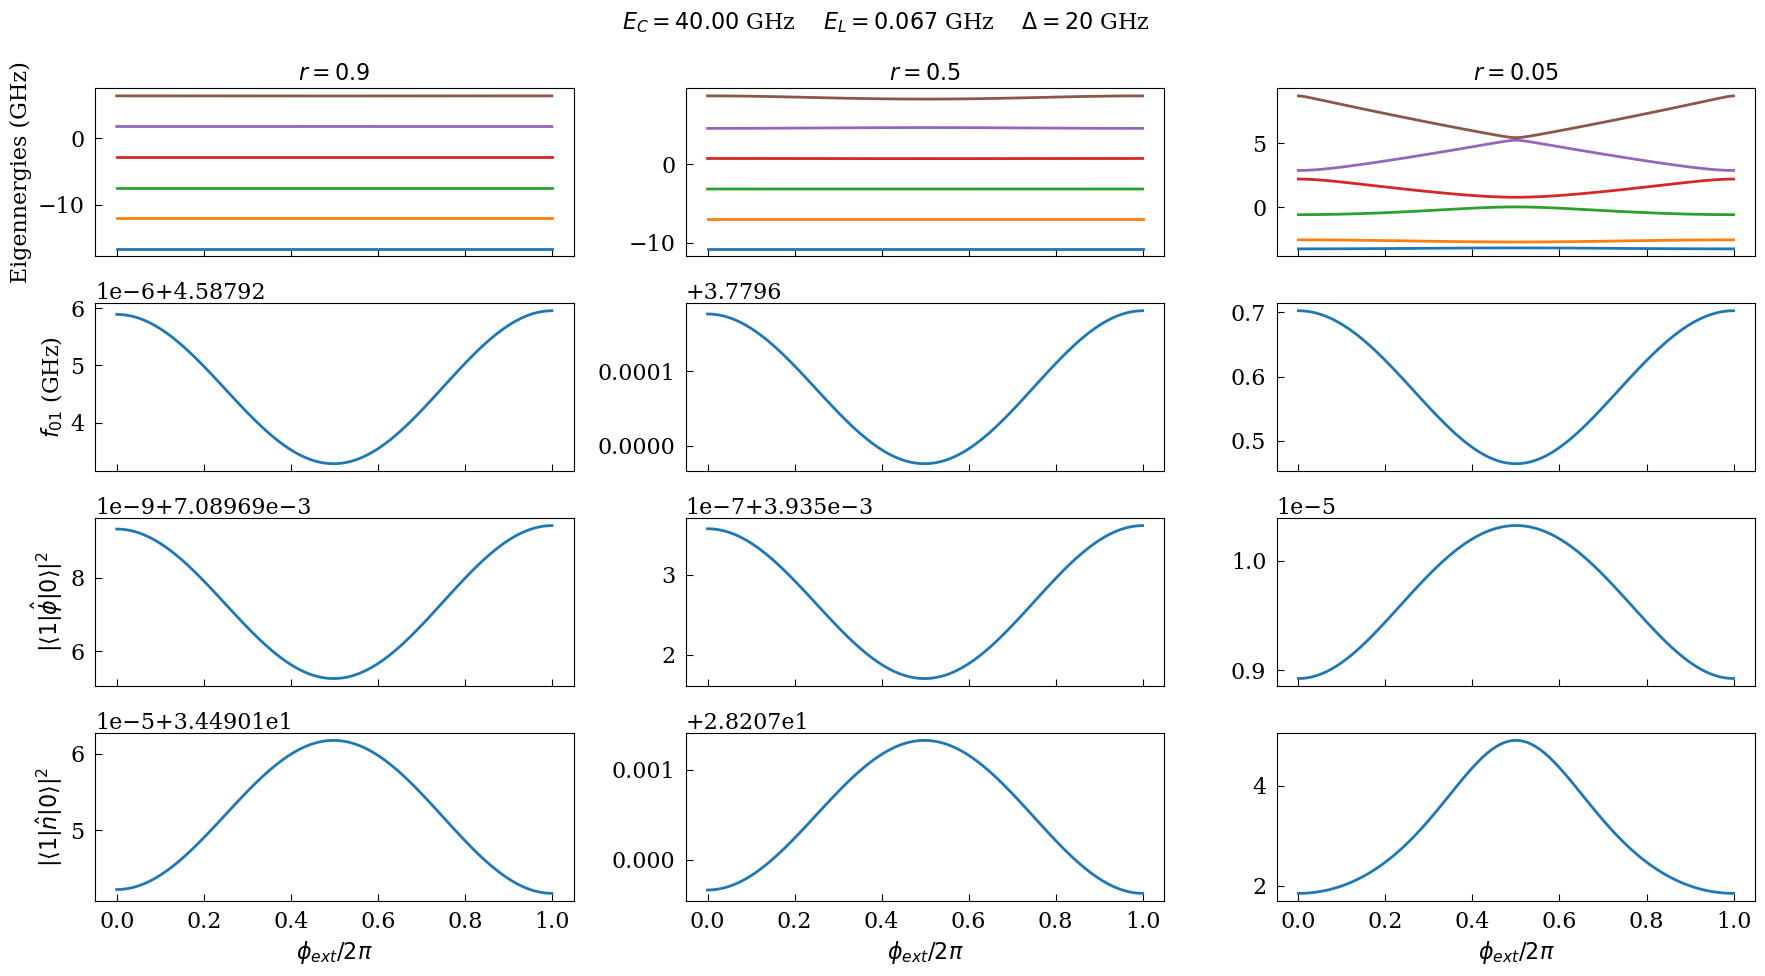

In [6]:
figure_features()
fig, axs = plt.subplots(4, 3, figsize=(18, 10), sharex = True, sharey = False)

plt.suptitle(r'$E_{C} = %.2f $ GHz $\quad E_{L} = %.3f$ GHz $\quad \Delta = %.0f$ GHz' %(Ec*1e-9, El*1e-9, EDelta*1e-9))
axs[0,0].plot(phi_list/2/np.pi, eigvals_list_r_10[:,:]*1e-9)
axs[0,0].set_ylabel(r'Eigennergies (GHz)')
axs[0,0].set_title(r'$r = 0.9$')

axs[1,0].plot(phi_list/2/np.pi, (eigvals_list_r_10[:,1]-eigvals_list_r_10[:,0])*1e-9)
axs[1,0].set_ylabel(r'$f_{01}$ (GHz)')

axs[2,0].plot(phi_list/2/np.pi, phi_matrix_elements_vs_phi_list[0,:])
axs[3,0].plot(phi_list/2/np.pi, n_matrix_elements_vs_phi_list[0,:])
axs[2,0].set_ylabel(r'$|\langle 1 | \hat{\phi} | 0 \rangle|^2$')
axs[3,0].set_ylabel(r'$|\langle 1 | \hat{n} | 0 \rangle|^2$')

axs[0,1].plot(phi_list/2/np.pi, eigvals_list_r_05[:,:]*1e-9)
axs[0,1].set_title(r'$r = 0.5$')

axs[1,1].plot(phi_list/2/np.pi, (eigvals_list_r_05[:,1]-eigvals_list_r_05[:,0])*1e-9)

axs[2,1].plot(phi_list/2/np.pi, phi_matrix_elements_vs_phi_list[1,:], label = r'$|\langle \phi | \hat{\phi} \rangle|^2$')
axs[3,1].plot(phi_list/2/np.pi, n_matrix_elements_vs_phi_list[1,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')

axs[0,2].plot(phi_list/2/np.pi, eigvals_list_r_005[:,:]*1e-9)
axs[0,2].set_title(r'$r = 0.05$')

axs[1,2].plot(phi_list/2/np.pi, (eigvals_list_r_005[:,1]-eigvals_list_r_005[:,0])*1e-9)

axs[2,2].plot(phi_list/2/np.pi, phi_matrix_elements_vs_phi_list[2,:], label = r'$|\langle \phi | \hat{\phi} \rangle|^2$')
axs[3,2].plot(phi_list/2/np.pi, n_matrix_elements_vs_phi_list[2,:], label = r'$|\langle \phi | \hat{n} \rangle|^2$')

axs[3,0].set_xlabel(r'$\phi_{ext}/2\pi$')
axs[3,1].set_xlabel(r'$\phi_{ext}/2\pi$')
axs[3,2].set_xlabel(r'$\phi_{ext}/2\pi$')

# axs[2,0].set_yscale('log')
# axs[2,1].set_yscale('log')
# axs[2,2].set_yscale('log')

fig.savefig('phi_sweep_Ec%.2f_El%.3f_EDelta%.0f.pdf' %(Ec*1e-9, El*1e-9, EDelta*1e-9), bbox_inches='tight')
plt.tight_layout()
# plt.show()